# Principle Compent Analysis
## Overview 
- [1. Why Need to Reduce Dimensionality?](#1)
- [2. Main Approaches for Dimensionality Reduction](#2)
    - [2.1 Projection](#2.1)
    - [2.2 Manifold Learning](#2.2)
- [3. Principle Compent Analysis](#3)
    - [3.1 Preserving the Variance](#3.1)
    - [3.2 Principal Components](#3.2)
    - [3.3 Projecting Down to d Dimensions](#3.3)
- [4. PCA in Sklearn](#4)
- [5. References](#5)



## Import package

In [1]:
import numpy as np
import pandas as pd
import warnings

from sklearn import datasets
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

## Dataset

In [2]:
# Overview about data that we will use in this notebook
iris = datasets.load_iris()
X = pd.DataFrame(iris['data'])
y = iris['target']

print(f'Original shape: {X.shape}')
print(f'Number examples: {X.shape[0]} \nNumber features: {X.shape[1]}')
X, y

Original shape: (150, 4)
Number examples: 150 
Number features: 4


(       0    1    2    3
 0    5.1  3.5  1.4  0.2
 1    4.9  3.0  1.4  0.2
 2    4.7  3.2  1.3  0.2
 3    4.6  3.1  1.5  0.2
 4    5.0  3.6  1.4  0.2
 ..   ...  ...  ...  ...
 145  6.7  3.0  5.2  2.3
 146  6.3  2.5  5.0  1.9
 147  6.5  3.0  5.2  2.0
 148  6.2  3.4  5.4  2.3
 149  5.9  3.0  5.1  1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

<a name='1' ></a>
## 1. Why Need to Reduce Dimensionality?

Many Machine Learning problems involve thousands or even millions of features for
each training instance. Not only does this make training extremely slow, it can also
make it much harder to find a good solution, as we will see. This problem is often
referred to as *the curse of dimensionality*.

Fortunately, in real-world problems, it is often possible to reduce the number of fea‐
tures considerably, turning an intractable problem into a tractable one.

*Reducing dimensionality does lose some information (just like
compressing an image to JPEG can degrade its quality), so even
though it will speed up training, it may also make your system 
perform slightly worse. It also makes your pipelines a bit more com‐
plex and thus harder to maintain. So you should first try to train
your system with the original data before considering using dimensionality 
reduction if training is too slow. In some cases, however,
reducing the dimensionality of the training data may filter out
some noise and unnecessary details and thus result in higher 
performance (but in general it won’t; it will just speed up training).*

<a name='2' ></a>
## 2. Main Approaches for Dimensionality Reduction
Before we dive into specific dimensionality reduction algorithms, let’s take a look at
the two main approaches to reducing dimensionality: projection and Manifold
Learning.

<a name='2.1' ></a>
### 2.1 Projection

In most real-world problems, training instances are not spread out uniformly across
all dimensions. Many features are almost constant, while others are highly correlated. 
As a result, all training instances actually lie within
(or close to) a much lower-dimensional subspace of the high-dimensional space. This
sounds very abstract, so let’s look at an example. You can see a 3D dataset represented by the circles.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/A 3D dataset lying close to a 2D subspace.png' alt="alternate text" width="width" height="height" style="width:600px;height:400px;" /> A 3D dataset lying close to a 2D subspace </div>

Notice that all training instances lie close to a plane: this is a lower-dimensional (2D)
subspace of the high-dimensional (3D) space. Now if we project every training
instance perpendicularly onto this subspace (as represented by the short lines 
connecting the instances to the plane), we get the new 2D dataset shown in below image.
Ta-da! We have just reduced the dataset’s dimensionality from 3D to 2D. Note that
the axes correspond to new features $z_1$ and $z_2$ (the coordinates of the projections on
the plane).

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/The new 2D dataset after projection.png' alt="alternate text" width="width" height="height" style="width:600px;height:400px;" /> The new 2D dataset after projection </div>

However, projection is not always the best approach to dimensionality reduction. In
many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset represented

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/Swiss roll dataset.png' alt="alternate text" width="width" height="height" style="width:700px;height:400px;" /> Swiss roll dataset </div>

Simply projecting onto a plane (e.g., by dropping $x_3$) would squash different layers of
the Swiss roll together, as shown on the left of Figure. However, what you really
want is to unroll the Swiss roll to obtain the 2D dataset on the right of Figure.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/Squashing by projecting onto a plane (left) versus unrolling the Swiss roll (right).png' alt="alternate text" width="width" height="height" style="width:700px;height:300px;" /> Squashing by projecting onto a plane (left) versus unrolling the Swiss roll
(right) </div>

<a name='2.2' ></a>
### 2.2 Manifold Learning
The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D
shape that can be bent and twisted in a higher-dimensional space. More generally, a
d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally
resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it
locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which
the training instances lie; this is called Manifold Learning. It relies on the manifold
assumption, also called the manifold hypothesis, which holds that most real-world
high-dimensional datasets lie close to a much lower-dimensional manifold. This
assumption is very often empirically observed.

Once again, think about the MNIST dataset: all handwritten digit images have some
similarities. They are made of connected lines, the borders are white, they are more
or less centered, and so on. If you randomly generated images, only a ridiculously
tiny fraction of them would look like handwritten digits. In other words, the degrees
of freedom available to you if you try to create a digit image are dramatically lower
than the degrees of freedom you would have if you were allowed to generate any
image you wanted. These constraints tend to squeeze the dataset into a lower-
dimensional manifold.

The manifold assumption is often accompanied by another implicit assumption: that
the task at hand (e.g., classification or regression) will be simpler if expressed in the
lower-dimensional space of the manifold. For example, in the top row of below Figure
the Swiss roll is split into two classes: in the 3D space (on the left), the decision
oundary would be fairly complex, but in the 2D unrolled manifold space (on the
right), the decision boundary is a simple straight line.

However, this assumption does not always hold. For example, in the bottom row of
below Figure, the decision boundary is located at $x_1 = 5$. This decision boundary looks
very simple in the original 3D space (a vertical plane), but it looks more complex in
the unrolled manifold (a collection of four independent line segments).

In short, if you reduce the dimensionality of your training set before training a
model, it will usually speed up training, but it may not always lead to a better or sim‐
pler solution; it all depends on the dataset.

Hopefully you now have a good sense of what the curse of dimensionality is and how
dimensionality reduction algorithms can fight it, especially when the manifold
assumption holds.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/The decision boundary may not always be simpler with lower dimensions.png' alt="alternate text" width="width" height="height" style="width:800px;height:500px;" /> The decision boundary may not always be simpler with lower dimensions </div>

<a name='3' ></a>
## 3. Principle Compent Analysis
In this part, we concentrate on projection approach.

<a name='3.1' ></a>
### 3.1 Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, you
first need to choose the right hyperplane. For example, a simple 2D dataset is repre‐
sented on the left of Figure, along with three different axes (i.e., one-dimensional
hyperplanes). On the right is the result of the projection of the dataset onto each of
these axes. As you can see, the projection onto the solid line preserves the maximum
variance, while the projection onto the dotted line preserves very little variance, and
the projection onto the dashed line preserves an intermediate amount of variance.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/Selecting the subspace onto which to project.png' alt="alternate text" width="width" height="height" style="width:700px;height:300px;" /> Selecting the subspace onto which to project </div>

It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections. Another
way to justify this choice is that it is the axis that minimizes the mean squared dis‐
tance between the original dataset and its projection onto that axis. This is the rather
simple idea behind PCA.

<a name='3.2' ></a>
### 3.2 Principal Components
Generally, we are interested in analyzing a large data set $X \in C^{n \times m}$

$$
X = 
\begin{bmatrix}
\mid & \mid &  & \mid \\
x_1 & x_2 & \cdots & x_m \\
\mid & \mid &  & \mid
\end{bmatrix}
$$

- $n$ is the number of trainin examples
- $m$ is the number of features 

The SVD is a unique matrix decomposition that exists for every complex-valued matrix $X \in C^{n \times m}$:

$$X = U \Sigma V^*$$

where $U \in C^{n \times n}$ and $V \in C^{m \times m}$ are unitary matrices1 with orthonormal columns, and $\Sigma \in R^{n \times m}$ is a matrix with real, non-negative entries on the diagonal and zeros off the diagonal. Here `∗` denotes the complex conjugate transpose.

- When $n \geq m$, the matrix $\Sigma$ has at most $m$ non-zero elements on the diagonal, and may be written as $\Sigma = \begin{bmatrix} \hat{\Sigma} \\ 0 \end{bmatrix}$. Therefore, it is possible to exactly represent $X$ using the economy SVD:

$$X = U \Sigma V^* = \begin{bmatrix} \hat{U} & \hat{U}^{\perp} \end{bmatrix} \begin{bmatrix} \hat{\Sigma} \\ 0 \end{bmatrix} V^* = \hat{U} \hat{\Sigma} V^*$$

The full SVD and economy SVD are shown in below figure. The columns of $\hat{U}^{\perp}$ span a vector space that is complementary and orthogonal to that spanned by $\hat{U}$. The columns of $U$ are called *left singular vectors* of $X$ and the columns of $V$ are *right singular vectors*. The diagonal elements of $\hat{\Sigma} \in C^{mxm}$ are called *singular values* and they are ordered from largest to smallest. The rank of $X$ is equal to the number of non-zero singular values.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/Schematic of matrices in the full and economy SVD.png' alt="alternate text" width="width" height="height" style="width:800px;height:550px;" /> Schematic of matrices in the full and economy SVD </div>

- When $n < m$ is similar.

$V$ contains all the principal components that we are looking for 

$$
V = 
\begin{bmatrix}
\mid & \mid &  & \mid \\
c_1 & c_2 & \cdots & c_m \\
\mid & \mid &  & \mid
\end{bmatrix}
$$

*Note: PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn’s PCA classes take care of centering the data for you. However, if you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t forget to center the data first.*

In [3]:
def SVDDecomposition(X):
    """
    Argument:
        X: a matrix of dataset with dimension (n, m)
        
    Returns:
        U: a matrix of left singular vectors with dimesion (n, n)
        S: a matrix singular values with dimesion (n, m)
        Vt: a transposed matrix of left singular vectors with dimesion (m, m)
    """
    n, m = X.shape[0], X.shape[1]
    U, S, Vt = np.linalg.svd(X)
    
    # Check some properties
    assert U.shape == (n, n), 'Invalid shape'
    # Because every value of S equal 0, except for major diagonal 
    # To reduce storage, numpy converts S from (n, m) to (m,)
    assert S.shape == (m,), 'Invalid shape'
    assert Vt.shape == (m, m), 'Invalid shape'
    assert np.all(S > 0), 'Invalid Sigma'
    
    return U, S, Vt

In [4]:
# Test function
X_centered = X - X.mean(axis=0)
U, S, Vt = SVDDecomposition(X_centered)

c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

c1, c2

(array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]),
 array([-0.65658877, -0.73016143,  0.17337266,  0.07548102]))

<a name='3.3' ></a>
### 3.3 Projecting Down to d Dimensions
Once you have identified all the principal components, you can reduce the dimen‐
sionality of the dataset down to d dimensions by projecting it onto the hyperplane
defined by the first d principal components. Selecting this hyperplane ensures that the
projection will preserve as much variance as possible.

To project the training set onto the hyperplane, you can simply compute the matrix
multiplication of the training set matrix $X$ by the matrix $W_d$ , defined as the matrix
containing the first d principal components.

$$X_{d-proj} = XW_d$$

In [5]:
def project(X, d):
    """
    Arg: 
        X: a matrix of dataset with dimension (n, m)
        d: number of components that you need
        
    Return:
        Xd: a matrix, projection of X on d-dimension space
    """
    # get svd decomposition 
    U, S, Vt = SVDDecomposition(X)
    
    # project down to d dimensions
    Wd = Vt.T[:, :d]
    Xd = X.dot(Wd)
    
    return Xd

In [6]:
# Test function
d = 2
Xd = project(X_centered, d)
Xd

,0,1
0,-2.684126,-0.319397
1,-2.714142,0.177001
2,-2.888991,0.144949
3,-2.745343,0.318299
4,-2.728717,-0.326755
...,...,...
145,1.944110,-0.187532
146,1.527167,0.375317
147,1.764346,-0.078859
148,1.900942,-0.116628


Name of target: ['setosa' 'versicolor' 'virginica']


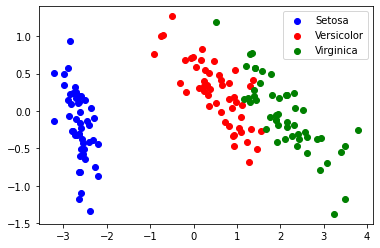

In [35]:
# y = 0 - setosa, y = 1 - versicolor, y = 2 - virginica
print(f"Name of target: {iris['target_names']}")

# This function only draw for 2D dimension
def visualize_iris(Xd, y):
    
    indexSetosa = np.squeeze(np.where(y == 0))
    indexVersicolor = np.squeeze(np.where(y == 1))
    indexVirginica = np.squeeze(np.where(y == 2))

    # get setosa points
    X0 = Xd.iloc[indexSetosa, :]
    y0 = y[indexSetosa]

    # get versicolor points
    X1 = Xd.iloc[indexVersicolor, :]
    y1 = y[indexVersicolor]

    # get virginica points
    X2 = Xd.iloc[indexVirginica, :]
    y2 = y[indexVirginica]

    plt.scatter(X0.iloc[:, 0], X0.iloc[:, 1], color='b', label='Setosa')
    plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='r', label='Versicolor')
    plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], color='g', label='Virginica')
    plt.legend()
    
visualize_iris(Xd, y)

<a name='4' ></a>
## 4. PCA in Sklearn

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X))

# You don't need to care about below code line
X_pca[1] = X_pca[1] * (-1)
X_pca

,0,1
0,-2.684126,-0.319397
1,-2.714142,0.177001
2,-2.888991,0.144949
3,-2.745343,0.318299
4,-2.728717,-0.326755
...,...,...
145,1.944110,-0.187532
146,1.527167,0.375317
147,1.764346,-0.078859
148,1.900942,-0.116628


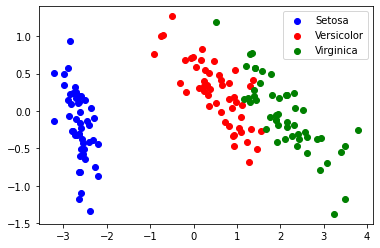

In [39]:
# Visualize
visualize_iris(X_pca, y)

As you see, PCA that you code from scratch and PCA in `sklearn` are similarity.

<a name='5' ></a>
## 5. References

- [Tiep Vu's blog, "Singular Value Decomposition"](https://machinelearningcoban.com/2017/06/07/svd/)
- [Brunton, Steven L., and J. Nathan Kutz. "Data-driven science and engineering: Machine learning, dynamical systems, and control", "Singular Value Decomposition". Cambridge University Press, 2022.](http://databookuw.com/databook.pdf)
- [Steven Bruton, "Singular Value Decomposition"](https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv)
- [Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf)